In [1]:
import pyAMARES

Current pyAMARES version is 0.3.0
Author: Jia Xu, MR Research Facility, University of Iowa


# Prior Knowledge Spreadsheet for pyAMARES
**[Try this tutorial on Google Colab!](https://colab.research.google.com/drive/1mVx7avSBsynBnYk_VVMeJWsAgfq4iR0G)**



- PyAMARES imports prior knowledge from spreadsheets to use as initial values and constraints for fitting MRS data based on the AMARES model function.
- The prior knowledge spreadsheet can be in CSV or MS Excel (xlsx) format.
- In this spreadsheet:
    - The upper half defines the initial values.
    - The lower half specifies the fitting constraints.
    - The parameters for a given peak are defined in a column of the spreadsheet.
- `pyAMARES.initialize_FID` can be used to load and preview the prior knowledge spreadsheet.
- **Comments**: Lines starting with `#` can be used to add comments to the prior knowledge spreadsheet.

- A simple example of peak parameter of a singlet

Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 #  An example of singlet,,



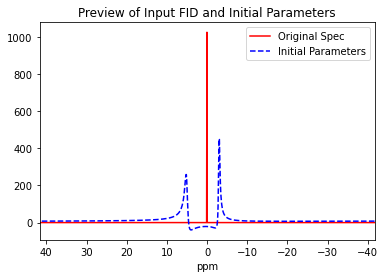

Printing the Prior Knowledge File /home/xujia/gitlab/pyAMARES/docs/source/notebooks/attachment/singlet.csv


,Peak_A,Peak_B
Index,,
Initial Values,NaN,NaN
amplitude,10,8
chemicalshift,5,-3
linewidth,100,50
phase,0,0
g,0,0
Bounds,NaN,NaN
amplitude,"(0,","(0,"
chemicalshift,NaN,NaN


In [2]:
single_obj =  pyAMARES.initialize_FID(fid=None,
                                priorknowledgefile='/home/xujia/gitlab/pyAMARES/docs/source/notebooks/attachment/singlet.csv',
                                preview=True) 

- **Initial Fitting Parameter**
    - The parsed initial prior knowledge is converted into an lmfit Parameter object.
    - Each parameter includes initial values, minimum and maximum limits, and a `vary` flag that indicates whether it is fixed during the fitting process.
    - In addition to editing the input spreadsheet, fitting parameters can also be manually modified in the code.
    - **Refinement of Fitted Parameters**: The fitted parameters (not shown in this tutorial) will be returned in the same format and can be refined for subsequent rounds of fitting.

## Spreadsheet Format

- **Index Column**: Always use the terms `amplitude`, `chemicalshift`, `linewidth`, `phase`, and `g` as index labels in the spreadsheet for both initial values and constraints  

- **Setup Constraints**:
   - Constraints are set using brackets. For example, `(-180, 180)` indicates a range from -180 to 180.
   - If only a lower bound is needed, omit the second half of the bracket. For example, `(0,` specifies a range of 0 and above.   

- **Physical Units**:
    - In the spreadsheet, the `amplitude` and `g` values are unitless. `chemicalshift` is measured in ppm, `linewidth` in Hz, and `phase` in degrees.

## Setting Up J-coupling Splitted Multiplets: An Example of In Vivo 31P MRS of the Human Brain at 7T

- **Peak Name Suffix**:
    - To set up a multiplet, designate the main sublet peak using ASCII letters, and define other sublets by adding numeric suffixes to the main peak name. For instance, the triplet for $\beta$-ATP is labeled `BATP`, `BATP2`, and `BATP3`.
    - Therefore, the numbers are not allowed in other peak names. 
    - Similarly, the doublet for $\gamma$-ATP is labeled `GATP` and `GATP2`.

- **Constraints for Multiplets**:
    - Parameters can be constrained using mathematical expressions, which is especially useful for multiplet setups.
    - Multiplets separated by J-coupling share parameters like phase and linewidth (LW). Constraints for these can be linked to the main peak name; for example, `BATP` in the `LW` and `phase` rows.
    - The `chemicalshifts` of sublets can be constrained relative to the main peak using its peak name and the J-coupling constants. For example, `BATP-15Hz` indicates the `chemicalshift` is set 15 Hz lower than that of $\beta$-ATP. If ppm is used, it will be converted to Hz using the `MHz` argument.
    - The `amplitude` of sublets can be related to the main peak. For instance, with $\beta$-ATP as a triplet having 1:2:1 amplitude ratios, the amplitude constraints for the sublets could be set as `BATP/2`. Similarly, for $\gamma$-ATP, where two sublets have a 1:1 amplitude ratio, the amplitude can be set as `GATP`.
    - Since the prior knowledge dataset spreadsheet is parsed from left to right, the peak that will be mathematically constrained to it must always be put to the left of the peaks that will be constrained. For example, for the multiplets, the main peak, such as `BATP`, will always be put to the left of `BATP2` or `BATP3`, whose amplitude constraints will be fixed as `BATP/2`.



Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 1 #  Phase not fixed,,,,,,,,,,,,,,,,



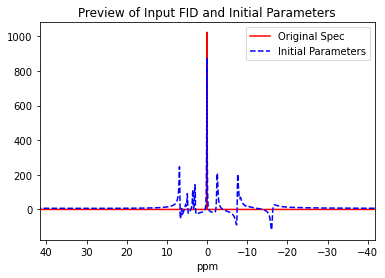

Printing the Prior Knowledge File /home/xujia/gitlab/pyAMARES/pyAMARES/examples/example_human_brain_31P_7T.csv


,BATP,BATP2,BATP3,AATP,AATP2,GATP,GATP2,UDPG,NAD,PCr,GPC,GPE,Pin,Pex,PC,PE
Index,,,,,,,,,,,,,,,,
Initial Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,1.41,BATP/2,BATP/2,1.545,AATP,1.5,GATP,0.08,0.41,4.37,1.32,0.8,0.85,0.3,0.3,2.27
chemicalshift,-16.15,BATP-15Hz,BATP+15Hz,-7.56,AATP-16Hz,-2.52,GATP-16Hz,-9.72,-8.25,0,2.95,3.5,4.82,5.24,6.24,6.76
linewidth,58.12,BATP,BATP,32.28,AATP,39.02,GATP,32.37,40.49,15.41,19.96,19.1,21.04,30.91,19.96,22.63
phase,0,BATP,BATP,0,AATP,0,GATP,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,"
chemicalshift,"(-16.20,-16.10)","(-16.20, -16.10)","(-16.20, -16.10)","(-7.58,-7.54)","(-7.58,-7.54)","(-2.53,-2.51)","(-2.53,-2.51)","(-9.76,-9.68)","(-8.25,-8.17)","(-0.5, 0.5)","(2.94,2.96)","(3.49,3.51)","(4.81,4.83)","(5.19,5.29)","(6.22,6.26)","(6.71,6.81)"


In [3]:
multiplet_obj =  pyAMARES.initialize_FID(fid=None,
                                priorknowledgefile='/home/xujia/gitlab/pyAMARES/pyAMARES/examples/example_human_brain_31P_7T.csv',
                                preview=True) 

- **Initial Fitting Parameter**

In [4]:
multiplet_obj.initialParams

name,value,initial value,min,max,vary,expression
ak_BATP,1.41000000,1.41,0.00000000,inf,True,
freq_BATP,-1938.00000,-1937.9999999999998,-1944.00000,-1932.00000,True,
dk_BATP,182.589365,182.58936502663877,0.00000000,194.499143,True,
phi_BATP,0.00000000,0.0,-3.14159265,3.14159265,True,
g_BATP,0.00000000,0.0,0.00000000,1.00000000,False,
ak_BATP2,0.70500000,0.705,0.00000000,inf,False,ak_BATP/2
freq_BATP2,-1944.00000,-3738.0,-1944.00000,-1932.00000,False,freq_BATP-15
dk_BATP2,182.589365,182.58936502663877,0.00000000,194.499143,False,dk_BATP
phi_BATP2,0.00000000,0.0,-3.14159265,3.14159265,False,phi_BATP
g_BATP2,0.00000000,0.0,0.00000000,1.00000000,False,
